In [76]:
import iris
import numpy
import matplotlib.pyplot as plt
import iris.plot as iplt

import seaborn

iris.FUTURE.netcdf_promote = True

In [57]:
%matplotlib inline

In [70]:
hist_infile = '/g/data/r87/dbi599/DRSv2/CMIP5/CSIRO-Mk3-6-0/historical/yr/all/r1i1p1/energy-budget/latest/energy-budget_yr_CSIRO-Mk3-6-0_historical_r1i1p1_all.nc'
rcp85_infile = '/g/data/r87/dbi599/DRSv2/CMIP5/CSIRO-Mk3-6-0/rcp85/yr/all/r1i1p1/energy-budget/latest/energy-budget_yr_CSIRO-Mk3-6-0_rcp85_r1i1p1_all.nc'
rcp26_infile = '/g/data/r87/dbi599/DRSv2/CMIP5/CSIRO-Mk3-6-0/rcp26/yr/all/r1i1p1/energy-budget/latest/energy-budget_yr_CSIRO-Mk3-6-0_rcp26_r1i1p1_all.nc'

In [73]:
def get_diff_cube(infile, var, region):
    """Take difference between southern and northern regions"""
    
    assert region in ['tropics', 'h']
    assert var in ['Surface Downwelling Net Radiation',
                   'Surface Upwelling Longwave Radiation',
                   'Surface Upward Latent Heat Flux',
                   'Downward Heat Flux at Sea Water Surface']
    
    svar =  '%s s%s ocean sum' %(var, region)
    nvar =  '%s n%s ocean sum' %(var, region) 
    
    s_cube = iris.load_cube(infile, svar)
    n_cube = iris.load_cube(infile, nvar)
    diff_cube = s_cube - n_cube

    return diff_cube


def plot_var(hist_file, rcp26_file,  rcp85_file, var, region):
    """Plot difference between northern and southern regions"""

    hist_diff_cube = get_diff_cube(hist_file, var, region)
    rcp26_diff_cube = get_diff_cube(rcp26_file, var, region)
    rcp85_diff_cube = get_diff_cube(rcp85_file, var, region)

    plt.figure(figsize=(9, 5))
    iplt.plot(hist_diff_cube, label='historical', color='blue')
    iplt.plot(rcp26_diff_cube, label='rcp26', color='green')
    iplt.plot(rcp85_diff_cube, label='rcp85', color='red')
    title = 'Annual Mean %s' %(var)
    plt.title(title)
    plt.legend()
    plt.xlabel('year')
    ylabel = 'southern %s sum - northern %s sum' %(region, region)
    plt.ylabel(ylabel)
    plt.show()

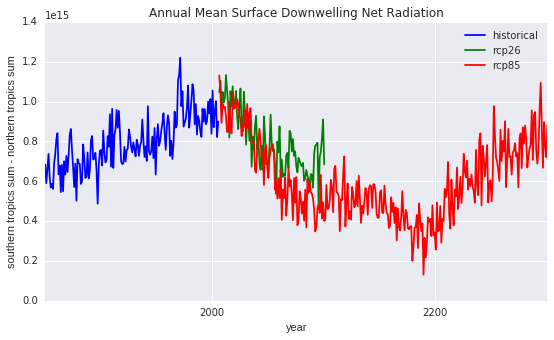

In [79]:
plot_var(hist_infile, rcp26_infile, rcp85_infile, 'Surface Downwelling Net Radiation', 'tropics')

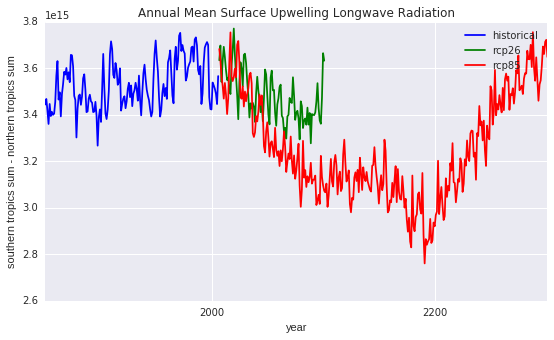

In [78]:
plot_var(hist_infile, rcp26_infile, rcp85_infile, 'Surface Upwelling Longwave Radiation', 'tropics')

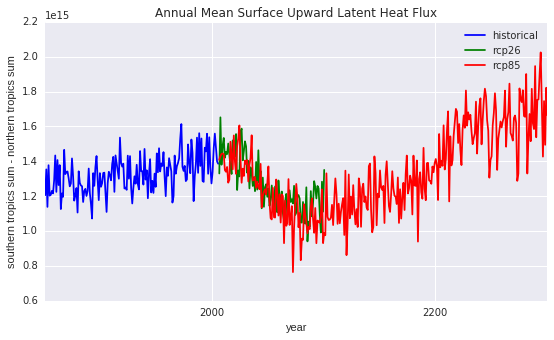

In [77]:
plot_var(hist_infile, rcp26_infile, rcp85_infile, 'Surface Upward Latent Heat Flux', 'tropics')

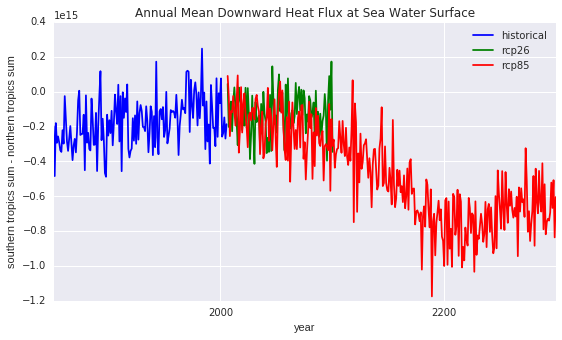

In [80]:
plot_var(hist_infile, rcp26_infile, rcp85_infile, 'Downward Heat Flux at Sea Water Surface', 'tropics')